Nama: Ashraf Alif Adillah    
NIM: 2602171161      
# Assurance of Learning 
## Scientific Computing - 2022/2023 Even Semester

The relationship between the average temperature on the earth's 
surface in odd years between 1981 - 1999, is given by the following below:
| Year(y) | Temperature(x, °C) | 
|---------|--------------------|
|1981| 14.1999|
|1983| 14.2411|
|1985| 14.0432| 
|1987| 14.2696|
|1989| 14.197|
|1991| 14.3055|
|1993| 14.1853| 
|1995| 14.3577| 
|1997| 14.4187| 
|1999| 14.3438|

a) Estimate the temperature in even years by linear, quadratic, 
and cubic interpolation order! Choose the method that you think is appropriate 
and explain the difference

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create dictionary from the above table
avgTemp = {
    1981: 14.1999,
    1983: 14.2411,
    1985: 14.0432,
    1987: 14.2696,
    1989: 14.197,
    1991: 14.3055,
    1993: 14.1853,
    1995: 14.3577,
    1997: 14.4187,
    1999: 14.3438
}

Y = [
    1981, 
    1983,
    1985,
    1987,
    1989,
    1991,
    1993,
    1995,
    1997,
    1999
]

X = [
    14.1999, 
    14.2411,
    14.0432, 
    14.2696, 
    14.197,
    14.3055,
    14.1853,
    14.3577,
    14.4187,
    14.3438
]

Yeven = Y[:len(Y)-1]
for i, j in enumerate(Yeven): 
    Yeven[i] = Yeven[i] + 1

In [26]:
from scipy.interpolate import interp1d
x = np.array(X)
y = np.array(Y)
even = np.array(Yeven)

f = interp1d(y, x, kind = 'linear')
f2 = interp1d(y, x, kind = 'quadratic')

# Estimated temperatures in even years 
# by Linear Interpolation
lin_y = even
lin_x = f(even)

print('Estimated Temperatures at Even Years\n')
print('by Linear Interpolation')
print('| %s  | %-15s |' % ('Years', 'Temperatures(°C)'))
print('|--------|------------------|')

for i in range(len(lin_y)): 
    print('|  %d  | %16.4lf |' % (lin_y[i], lin_x[i]))

# Estimated temperatures in even years 
# by Quadratic Interpolation
quad_y = even
quad_x = f2(even)

print('\n\nEstimated Temperatures at Even Years\n')
print('by Quadratic Interpolation')
print('| %s  | %-15s |' % ('Years', 'Temperatures(°C)'))
print('|--------|------------------|')

for i in range(len(quad_y)): 
    print('|  %d  | %16.4lf |' % (quad_y[i], quad_x[i]))

Estimated Temperatures at Even Years

by Linear Interpolation
| Years  | Temperatures(°C) |
|--------|------------------|
|  1982  |          14.2205 |
|  1984  |          14.1422 |
|  1986  |          14.1564 |
|  1988  |          14.2333 |
|  1990  |          14.2512 |
|  1992  |          14.2454 |
|  1994  |          14.2715 |
|  1996  |          14.3882 |
|  1998  |          14.3812 |


Estimated Temperatures at Even Years

by Quadratic Interpolation
| Years  | Temperatures(°C) |
|--------|------------------|
|  1982  |          14.2676 |
|  1984  |          14.1203 |
|  1986  |          14.1478 |
|  1988  |          14.2441 |
|  1990  |          14.2539 |
|  1992  |          14.2427 |
|  1994  |          14.2534 |
|  1996  |          14.4092 |
|  1998  |          14.3969 |


[14.1999 14.2411 14.0432 14.2696 14.197  14.3055 14.1853 14.3577 14.4187
 14.3438]
[1981 1983 1985 1987 1989 1991 1993 1995 1997 1999]


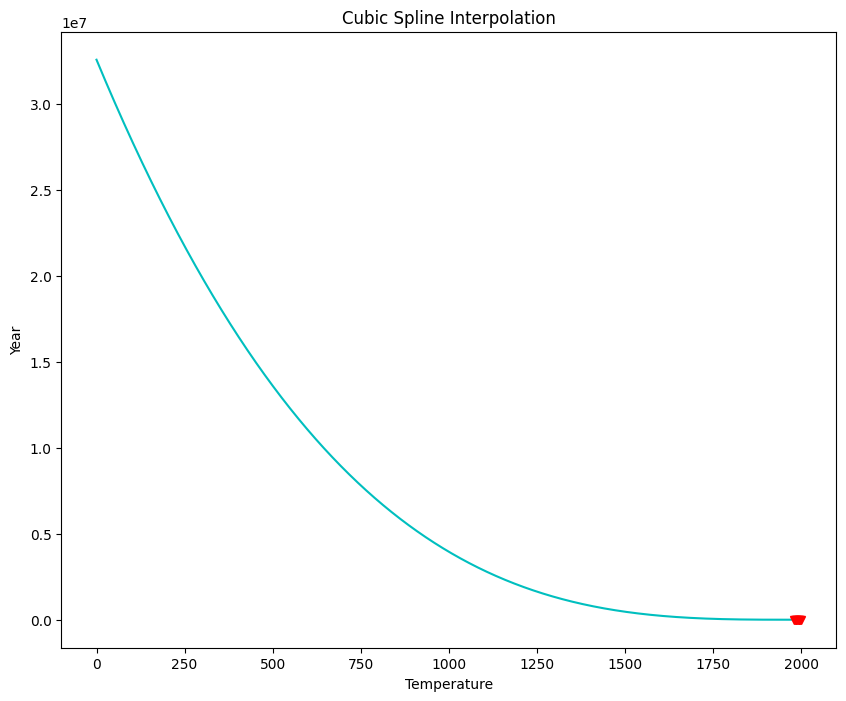

In [90]:
from scipy.interpolate import CubicSpline
sortedX = X.copy()
sortedY = Y.copy()
sortedX.sort()
sortedY.sort()
f = CubicSpline(sortedY, sortedX, bc_type='natural')
y_new = np.linspace(0, 2000, 100000)
x_new = f(y_new)

print(x)
print(y)

plt.figure(figsize=(10,8))
plt.plot(y_new, x_new, 'c')
plt.plot(y, x, 'rv')
plt.title('Cubic Spline Interpolation')
plt.xlabel("Temperature")
plt.ylabel("Year")
plt.show()

b) Perform a least-square regression of the above data to estimate
the temperature in even years

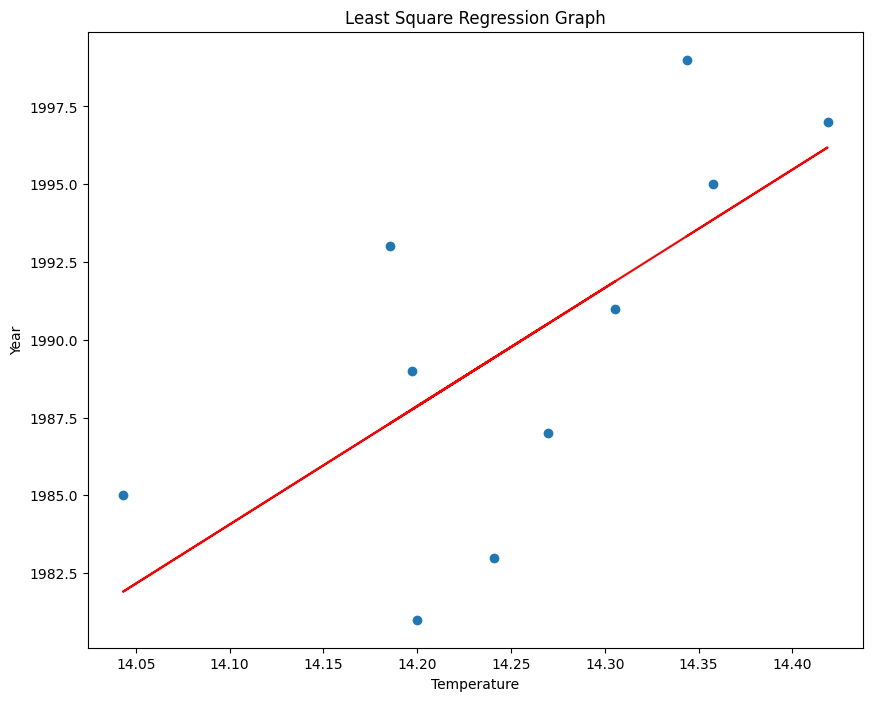

In [5]:
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)

gradient = alpha[0]*x + alpha[1]

plt.figure(figsize=(10,8))
plt.plot(x, y, 'o')
plt.plot(x, gradient, 'r')
plt.xlabel("Temperature")
plt.ylabel("Year")
plt.title('Least Square Regression Graph')
plt.show()